# Section 2 - Web services and REST APIs
_Complete the following Python tasks. Comments aren't required but they can be helpful in awarding partial credit if you fail to get the correct answer._

##### ► ► ► This notebook should be run using the `gis` environment ◄ ◄ ◄

## Task 1. Using the NWIS web site as a REST API
Modify the code below, which downloads the most recent day's data for the USGS gage for Eno River near Durham, NC (Gage ID 02085070), so that it downloads the **last 7 day's data** for **Eno River At Cole Mill Rd Nr Huckleberry Spring (Gage ID 02085039)**
* Resource: `1-NWIS-discharge-data-as-API.ipynb` in the `UsingAPIs` repository.

In [1]:
#Import the requests package
import requests
%matplotlib inline

In [3]:
#dissect the URL into it's components, for easy comprehension -- and easy modification
serviceURL = 'http://waterdata.usgs.gov/nwis/uv'
parameters = {'cb_00060':'on',
              'cb_00065':'on',
              'format':'rdb',
              'period':'1',  
              'site_no':'02085070',
              'begin_date':'',
              'end_date':''
             }

In [6]:
#Pass the url and its parameters to the server and get its response, in text format
response = requests.get(serviceURL,parameters)
responseText = response.text

In [7]:
#Convert the response text into a list of lines and print the second to last line
responseLines = responseText.split('\n')
lastRecord = responseLines[-2].split('\t')
site = lastRecord[1]
cfs = lastRecord[4]
date = lastRecord[2]

#Report the most recent record
print("Site {0} recorded a discharge of {1} cfs on {2}".format(site,cfs,date))

Site 02085070 recorded a discharge of 18.5 cfs on 2022-12-02 21:40


## Task 2. Exploring the ESRI REST API
In this exercise, we'll use Durham ArcGIS Services to obtain a shapefile of park locations, including only those that contain disc golf courses. 

### Task 2a. Familiarization with the ESRI REST services
The City of Durham hosts provides access to its GIS web services via this link: https://webgis.durhamnc.gov/server/rest/services. 
* In your web browser, open the `PublicServices` folder to reveal the services hosted there. 
* Navigate to the `Community` MapServer REST endpoint. In the code cell below, assign the link's URL to the variable `map_service` and print it.

In [8]:
#Assign the URL for the Durham Community MapService (found in  
# the Public Services folder) to a varible, then print it.
map_service = 'https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer'
print(map_service)

https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer


* Back in your web browser, navigate into the REST endpoint for the **Parks** feature layer included in this service. Assign its URL to the variable `parks_layer` and print it.

In [9]:
#Assign the URL for the Park Points feature layer service (located 
#  within the Parks feature service above), then print it.
parks_layer = 'https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8'
print(parks_layer)

https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8


 ► _Explore the fields included in this service. We will use them to query records from this service._

* Open the query interface for the Park Points feature layer in your web browser ([link](https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query)).

* Fetch the first record's attributes by entering the following in the query interface and then clicking `Query (GET)`:
 * Where: `PROPTYPE = 'Park'` (to get just the the parks)
 * Out Fields: `*` (to retrieve all fields)
 
* In the code cell below, ass the URL associated with this request to the variable `request_url`, then print it.  
(_It may have several "empty" parameters, but that's fine..._)

In [10]:
#Assign the URL for the request formed above to a variable, then print it.
request_url  = 'https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=PROPTYPE+%3D+%27Park%27&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=html'
print(request_url)

https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=PROPTYPE+%3D+%27Park%27&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=html


### Task 2b. Modifying our request and processing results
* Modify the request (either via the browser interface or just by editing the request string in the code cell above) so that it returns all park features **that have have a disc golf course** (`DISCGOLF='Yes'`), and **outputs the result in JSON format**.</u>. Assign this URL to the variable `theURL` below and print it.

In [13]:
#Enter the URL for the request returning all parks with disc_golf courses. 
theURL = 'https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=PROPTYPE+%3D+%27Park%27+AND+DISCGOLF%3D%27Yes%27&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson'
print(theURL)

https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=PROPTYPE+%3D+%27Park%27+AND+DISCGOLF%3D%27Yes%27&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson


* We can read the json object generated by this URL above directly into a GeoPandas geodataframe (code provided).

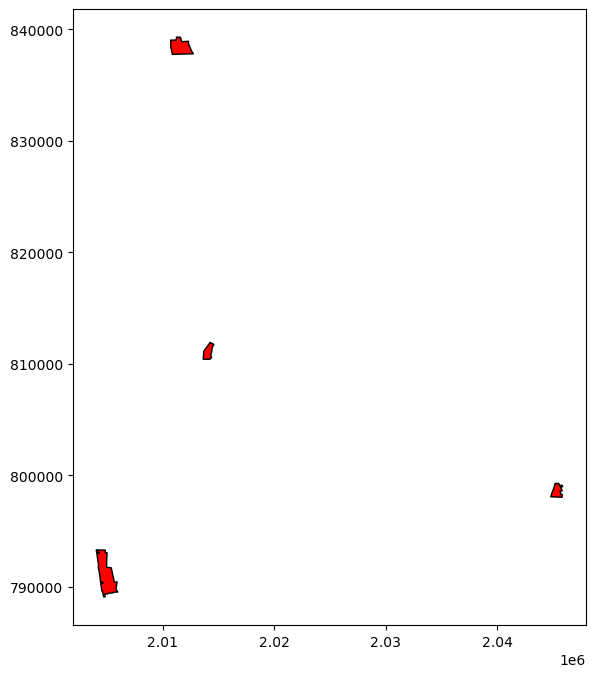

In [14]:
#Converting our saved JSON file to a feature class using ArcPy
import geopandas as gpd
gdf_Parks = gpd.read_file(theURL)

#Plot the geodataframe
ax = gdf_Parks.plot(color='red',edgecolor='black',figsize=(8,8))

#Uncomment the lines below if you have contextily 
#import contextily as cx
#cx.add_basemap(ax=ax,source=cx.providers.Esri.DeLorme)

* We can compute spatial statistics bases on the geodataframe's geometry. One stat is shown below.  
→ **See if you can calculate the second. (Don't worry about rounding...)**

In [17]:
#This command shows the size of the largest frisbee golf course park, in sq meters
gdf_Parks['geometry'].area.max()

4160273.3382017114

In [18]:
#What is the *total* area of parks with frisbee golf courses in Durham?
gdf_Parks['geometry'].area.sum()

8105326.119445884

### Challenge
Apply the concepts above to compute the number of parks in Durham that have swings and create a simple map of them.

In [19]:
#Form the request
NewURL = 'https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=SWINGS%3D%27Yes%27&f=pjson'
print(NewURL)

https://webgis.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/8/query?where=SWINGS%3D%27Yes%27&f=pjson


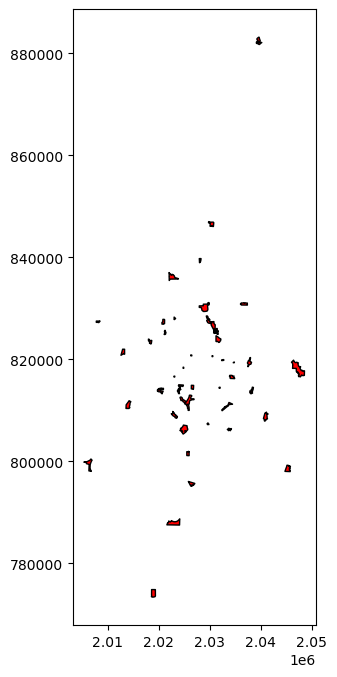

In [20]:
#Convert the request to a geodataframe
gdf_Parks_swings = gpd.read_file(NewURL)

#Plot the geodataframe
ax = gdf_Parks_swings.plot(color='red',edgecolor='black',figsize=(8,8))


In [21]:
#Show how many records are in the geodataframe
len(gdf_Parks_swings)

42

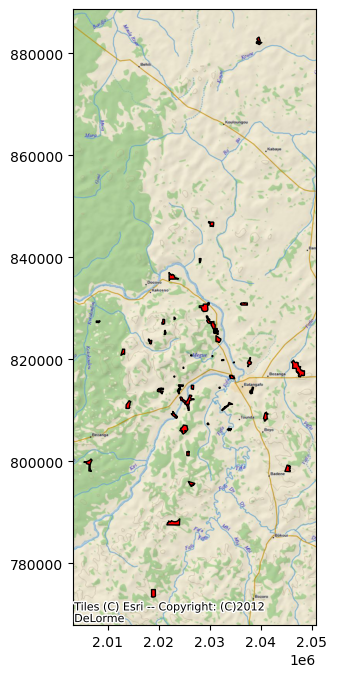

In [22]:
#Plot the geodataframe
ax = gdf_Parks_swings.plot(color='red',edgecolor='black',figsize=(8,8))
import contextily as cx
cx.add_basemap(ax=ax,source=cx.providers.Esri.DeLorme)